In [348]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

In [10]:
#reduce file is the data with the 37 questions selected
reduced_file = "Resources/OSMI_2016_small_df.csv"
df = pd.read_csv(reduced_file)
df.head(1)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,Do you think that discussing a mental health disorder with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,...,"If so, what condition(s) were you diagnosed with?",Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,No,No,I don't know,No,Maybe,...,"Anxiety Disorder (Generalized, Social, Phobia,...",0,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes


#### <span style="color:green">Consolidating Genders into 3 Categories (.replace())</span>

In [49]:
#Reduces the gender column to 3 values: Male, Female, Other

df['What is your gender?'] = df['What is your gender?'].replace({
    'male': 'Male',
    'Male ': 'Male',
    'm': 'Male',
    'man': 'Male',
    'M2F': 'Male',
    'Cis male': 'Male',
    'Male.': 'Male',
    'Male (cis)': 'Male',
    'Man': 'Male',
    'Sex is male': 'Male',
    'cis male': 'Male',
    'Dude': 'Male',
    "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ":'Male',
    'mail': 'Male',
    'male ': 'Male',
    'Cis Male': 'Male',
    'cisdude': 'Male',
    'cis man': 'Male',
    'MALE': 'Male',
    'M': 'Male',
    'Malr': 'Male'
})

df['What is your gender?'] = df['What is your gender?'].replace({
    'F': 'Female',
    'female': 'Female',
    'F ': 'Female',
    'female ': 'Female',
    'Woman': 'Female',
    'fm': 'Female',
    'f': 'Female',
    'Cis female ': 'Female',
    'Female ': 'Female',
    'woman': 'Female',
    'Sex is Female': 'Female',
    'female/woman': 'Female',
    'Cisgender Female': 'Female',
    "fem":'Female',
    'Female (props for making this a freeform field, though)': 'Female',
    ' Female': 'Female',
    'Cis-woman': 'Female'
})

#temp variable to hold the gender column values
g = df['What is your gender?']

# changes what is not  Male or Female,  to `other`
for i in range(len(g)):
    if g[i] not in ['Male', 'Female']:
        df['What is your gender?'] = g.replace({g[i]: 'Other'})
        
        
print(f"There are only {df['What is your gender?'].nunique()} different genders now")

There are only 3 different genders now


In [50]:
df['What is your gender?'].value_counts()

Male      1056
Female     336
Other       41
Name: What is your gender?, dtype: int64

In [51]:
print('Column count: ', len(df.columns))

Column count:  37


#### <span style="color:green">short_col: dictionary with only the Question number (Eg: Q1, Q2 ...)</span>

In [60]:
# short_col is the dictionary with only the Question number (Example: Q1, Q2 ...)

short_cols = {
                    
       'Are you self-employed?': "Q1" ,
       'How many employees does your company or organization have?': "Q2",
       'Is your employer primarily a tech company/organization?': "Q3",
       'Is your primary role within your company related to tech/IT?': "Q4",
       'Does your employer provide mental health benefits as part of healthcare coverage?': "Q5",
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?':"Q6",
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?':"Q7",
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': "Q8",
       'Do you think that discussing a mental health disorder with your employer would have negative consequences?': "Q9",
       'Would you feel comfortable discussing a mental health disorder with your coworkers?': "Q10",
       'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?': "Q11",
       'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?': "Q12",
       'Do you know local or online resources to seek help for a mental health disorder?': "Q13",
       'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?':"Q14",
       'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?': "Q15",
       'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?': "Q16",
       'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?': "Q17",
       'Did you feel that your previous employers took mental health as seriously as physical health?': "Q18",
       'Do you feel that being identified as a person with a mental health issue would hurt your career?': "Q19",
       'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?': "Q20",
       'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?':"Q21",
       'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?':"Q22" ,
    
        'Do you have a family history of mental illness?':"Q23",
       'Have you had a mental health disorder in the past?':"Q24",
       'Do you currently have a mental health disorder?':"Q25",
       'If yes, what condition(s) have you been diagnosed with?':"Q26",
       'Have you been diagnosed with a mental health condition by a medical professional?':"Q27",
       'If so, what condition(s) were you diagnosed with?':"Q28",
       'Have you ever sought treatment for a mental health issue from a mental health professional?':"Q29",
       'What is your age?':"Q30",
       'What is your gender?': "Q31",
       'What country do you live in?': "Q32",
       'What US state or territory do you live in?': "Q33",
       'What country do you work in?': "Q34",
       'What US state or territory do you work in?':"Q35",
       'Which of the following best describes your work position?':"Q36",
       'Do you work remotely?':"Q37"
                    
}

In [61]:
#create inverse dictionary with a dictionary comprehension
 #we use the inverse dictionary to display questions in our results
long_cols = {v: k for k, v in short_cols.items()}

In [62]:
# long_cols is the dictionary with the question labels as the values
# - can be used to display only the labels in a dataframe
long_cols

{'Q1': 'Are you self-employed?',
 'Q2': 'How many employees does your company or organization have?',
 'Q3': 'Is your employer primarily a tech company/organization?',
 'Q4': 'Is your primary role within your company related to tech/IT?',
 'Q5': 'Does your employer provide mental health benefits as part of healthcare coverage?',
 'Q6': 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
 'Q7': 'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
 'Q8': 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'Q9': 'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
 'Q10': 'Would you feel comfortable discussing a mental health disorder with your coworkers?',
 'Q11': 'Would you feel comfortable discu

In [63]:
df.columns[:5]

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?'],
      dtype='object')

In [64]:
# q_col_df is the dataframe with only the question number as the header (Example: Q1, Q2...)
q_cols_df = df.rename(columns= short_cols)

In [65]:
q_cols_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 37 columns):
Q1     1433 non-null int64
Q2     1146 non-null object
Q3     1146 non-null float64
Q4     263 non-null float64
Q5     1146 non-null object
Q6     1146 non-null object
Q7     1146 non-null object
Q8     1146 non-null object
Q9     1146 non-null object
Q10    1146 non-null object
Q11    1146 non-null object
Q12    1146 non-null object
Q13    287 non-null object
Q14    287 non-null object
Q15    144 non-null object
Q16    287 non-null object
Q17    287 non-null object
Q18    1264 non-null object
Q19    1433 non-null object
Q20    1433 non-null object
Q21    1344 non-null object
Q22    657 non-null object
Q23    1433 non-null object
Q24    1433 non-null object
Q25    1433 non-null object
Q26    568 non-null object
Q27    1433 non-null object
Q28    711 non-null object
Q29    1433 non-null int64
Q30    1433 non-null int64
Q31    1433 non-null object
Q32    1433 non-null object
Q33    

In [66]:
raw_df = df.rename(columns= long_cols)

In [67]:
# raw df is the data frame with questions as columns
raw_df.head(1)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,Do you think that discussing a mental health disorder with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,...,"If so, what condition(s) were you diagnosed with?",Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,No,No,I don't know,No,Maybe,...,"Anxiety Disorder (Generalized, Social, Phobia,...",0,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes


In [68]:
# create a for loop to add the question number to the question label (Example: Q1- Are you self-employed?)
q_names_cols = {}
for i in range(0,len(df.columns)):
    q_names_cols[df.columns[i]] =   f"Q{i+1}- {df.columns[i]}"

In [69]:
# q_names_cols

In [71]:
# Create dataframe the the question name and question label 
q_names_df = df.rename(columns= q_names_cols)

In [72]:
#qnames df is the data frame with the question number and the question label
q_names_df.head(1)

,Q1- Are you self-employed?,Q2- How many employees does your company or organization have?,Q3- Is your employer primarily a tech company/organization?,Q4- Is your primary role within your company related to tech/IT?,Q5- Does your employer provide mental health benefits as part of healthcare coverage?,"Q6- Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Q7- Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Q8- Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,Q9- Do you think that discussing a mental health disorder with your employer would have negative consequences?,Q10- Would you feel comfortable discussing a mental health disorder with your coworkers?,...,"Q28- If so, what condition(s) were you diagnosed with?",Q29- Have you ever sought treatment for a mental health issue from a mental health professional?,Q30- What is your age?,Q31- What is your gender?,Q32- What country do you live in?,Q33- What US state or territory do you live in?,Q34- What country do you work in?,Q35- What US state or territory do you work in?,Q36- Which of the following best describes your work position?,Q37- Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,No,No,I don't know,No,Maybe,...,"Anxiety Disorder (Generalized, Social, Phobia,...",0,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes


#### <span style="color:green">q_names_df.columns</span>

In [73]:
q_names_df.columns

Index(['Q1- Are you self-employed?',
       'Q2- How many employees does your company or organization have?',
       'Q3- Is your employer primarily a tech company/organization?',
       'Q4- Is your primary role within your company related to tech/IT?',
       'Q5- Does your employer provide mental health benefits as part of healthcare coverage?',
       'Q6- Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Q7- Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Q8- Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'Q9- Do you think that discussing a mental health disorder with your employer would have negative consequences?',
       'Q10- Would you feel comfortable discussing a mental health disorder with your coworkers?',
 

#### <span style="color:deeppink">VARIABLES</span>

In [115]:
self_employed_count = int(q_names_df[q_names_df['Q1- Are you self-employed?'] == 1][['Q1- Are you self-employed?']].count())
employed_count =int(q_names_df[q_names_df['Q1- Are you self-employed?'] == 0][['Q1- Are you self-employed?']].count())

total_survey_workers_count = int(employed_count + self_employed_count)
tech_workers_count = int(q_cols_df[q_cols_df['Q4'] == 1.0]['Q4'].count())
other_workers_count = int(total_survey_workers_count - tech_workers_count)


In [132]:
print(f"total_survey_workers_count: {total_survey_workers_count}")
print(f"tech_workers_count: {tech_workers_count}")
print(f"other_workers_count: {other_workers_count}")

total_survey_workers_count: 1433
tech_workers_count: 248
other_workers_count: 1185


In [76]:
# Count of tech + non tech workers based on answers to Q4[0.0 or 1.0]

print('Tech or not: ', q_cols_df[(q_cols_df['Q4'] == 0.0) | (q_cols_df['Q4'] == 1.0)]['Q4'].count())
print('Tech: ', q_cols_df[q_cols_df['Q4'] == 1.0]['Q4'].count() )
print('non Tech: ', q_cols_df[q_cols_df['Q4'] == 0.0]['Q4'].count() )

Tech or not:  263
Tech:  248
non Tech:  15


#### <span style="color:yellow">Q4: Is Employee Role in tech? +  Cleanup answers to Q: [19,20,21,29]</span>

In [133]:
# Q4: Is Employee Role in tech?
tech_workers_df = pd.DataFrame(q_cols_df[q_cols_df['Q4'] == 1.0])

tech_workers_df['Q4'] = tech_workers_df['Q4'].replace({1.0: "Yes"})

tech_workers_df['Q20'] = tech_workers_df['Q20'].replace({
    "Yes, I think they would": "Yes",
    "Yes, they do": "Yes",
    "No, I don't think they would": "No",
    "No, they do not": "No"
    })

tech_workers_df['Q21'] = tech_workers_df['Q21'].replace({
    "Maybe/Not sure": "Maybe",
    "Yes, I observed": "Yes",
    "Yes, I experienced": "Yes",
    })

tech_workers_df['Q19'] = tech_workers_df['Q19'].replace({
    "Yes, I think it would": "Yes",
    "Yes, it has": "Yes",
    "No, I don't think it would": "No",
    "No, it has not": "No"
    })

tech_workers_df['Q29'] = tech_workers_df['Q29'].replace({
    1: "Yes",
    0: "No"
    })

# tech_workers_df['Q19'].value_counts().index


In [134]:
# REDUCING TECH WORKERS DF TO RELEVANT COLUMNS
tech_workers_df = tech_workers_df[['Q31','Q4', 'Q27', 'Q29', 'Q23', 'Q24', 'Q25', 'Q8']]

In [135]:
tech_workers_df.head(3)

,Q31,Q4,Q27,Q29,Q23,Q24,Q25,Q8
4,Female,Yes,Yes,Yes,Yes,Yes,Yes,No
8,Female,Yes,Yes,Yes,Yes,Yes,Yes,I don't know
11,Male,Yes,Yes,Yes,Yes,Yes,Yes,I don't know


#### <span style="color:green">tech_workers grouped by 'Q31': Gender</span>

In [136]:
# Tech Workers  grouped by genders  =======================
tech_gender_group = tech_workers_df.groupby('Q31').count()['Q4']

In [146]:
print(tech_gender_group[0])   # types are numpyint64
print(tech_gender_group[1])
print(tech_gender_group[2])

tech_gender_group

60
182
6
<class 'numpy.int64'>


Q31
Female     60
Male      182
Other       6
Name: Q4, dtype: int64

#### <span style="color:lime">tech workers diagnosed by MH pro</span>

In [148]:
# Count of Tech workers diagnosed  =======================================================================
diagnosed_tech_workers = tech_workers_df[tech_workers_df['Q27'] == 'Yes'].groupby('Q31').count()['Q27']

In [155]:
diagnosed_tech_workers

Q31
Female    40
Male      82
Other      5
Name: Q27, dtype: int64

#### <span style="color:yellow">Summary Table: Tech Workers + Diagnosed Tech Workers</span>

In [152]:
tech_and_diagnosed_df = pd.DataFrame({
    'Tech Workers Count': tech_gender_group,
    'Tech Workers %': round((tech_gender_group/tech_gender_group.sum()) * 100,1),
    'Diagnosed Tech Workers': diagnosed_tech_workers,
    'Diagnosed %': round((diagnosed_tech_workers/(tech_gender_group)) * 100,1),
    
})

In [153]:
tech_and_diagnosed_df.sort_values('Tech Workers Count', ascending=False, inplace=True)

In [166]:
tech_and_diagnosed_df

,Tech Workers Count,Tech Workers %,Diagnosed Tech Workers,Diagnosed %
Q31,,,,
Male,182,73.4,82,45.1
Female,60,24.2,40,66.7
Other,6,2.4,5,83.3


In [168]:
# TODO: From   tech_and_diagnosed_df Remove 'Tech Workers %' to get this result

tech_and_diagnosed_df[[tech_and_diagnosed_df.columns[0],tech_and_diagnosed_df.columns[2], tech_and_diagnosed_df.columns[3]] ]

,Tech Workers Count,Diagnosed Tech Workers,Diagnosed %
Q31,,,
Male,182,82,45.1
Female,60,40,66.7
Other,6,5,83.3


# <span style="color:deeppink">BELEIVES_anonymity_sought_treatment_df</span>

In [276]:
believes_anonymity = tech_workers_df[(tech_workers_df['Q27'] == 'Yes') & (tech_workers_df['Q8'] == 'Yes')].groupby('Q31').count()['Q8']
# believes_anonymity

In [232]:
believes_anonymity_sought_treatment = \
tech_workers_df[(tech_workers_df['Q27'] == 'Yes') & (tech_workers_df['Q8'] == 'Yes') & (tech_workers_df['Q29'] == 'Yes')].groupby('Q31').count()['Q29']

In [198]:
believes_anonymity_sought_treatment_df = pd.DataFrame({
    'Count': tech_gender_group,
    'Diagnosed': diagnosed_tech_workers,
    'Anonymity': believes_anonymity,
    'Anonymity & sought treatment': believes_anonymity_sought_treatment,
    'Anonymity & sought treatment %': round(believes_anonymity_sought_treatment/believes_anonymity*100,)
    
})

In [187]:
believes_anonymity_sought_treatment_df

,Count,Diagnosed,Anonymity,Anonymity & sought treatment,Anonymity & sought treatment %
Q31,,,,,
Female,60,40,10,9,90.0
Male,182,82,22,21,95.5
Other,6,5,2,2,100.0


# <span style="color:deeppink">UNCERTAIN_anonymity_sought_treatment_df</span>

In [280]:
uncertain_about_anonymity = \
tech_workers_df[(tech_workers_df['Q27'] == 'Yes') & (tech_workers_df['Q8'] == "I don't know")].groupby('Q31').count()['Q8']

In [281]:
uncertain_anonymity_sought_treatment = \
tech_workers_df[(tech_workers_df['Q27'] == 'Yes') & (tech_workers_df['Q8'] == "I don't know") & (tech_workers_df['Q29'] == 'Yes')].groupby('Q31').count()['Q29']


In [283]:
uncertain_anonymity_sought_treatment_df = pd.DataFrame({
    'Count': tech_gender_group,
    'Diagnosed': diagnosed_tech_workers,
    'Uncertain About Anonymity': uncertain_about_anonymity,
    'Uncertain Anonymity & sought treatment': uncertain_anonymity_sought_treatment,
    'Uncertain Anonymity & sought treatment %': round(uncertain_anonymity_sought_treatment/uncertain_about_anonymity*100,1)
    
})

In [284]:
uncertain_anonymity_sought_treatment_df.index.name = 'Gender'

In [284]:
uncertain_anonymity_sought_treatment_df

,Count,Diagnosed,Uncertain About Anonymity,Uncertain Anonymity & sought treatment,Uncertain Anonymity & sought treatment %
Gender,,,,,
Female,60,40,28,27,96.4
Male,182,82,58,53,91.4
Other,6,5,3,3,100.0


In [307]:
print('Uncertain Anonymity & sought treatment %','\n',uncertain_anonymity_sought_treatment.sum()/uncertain_about_anonymity.sum())
print()
print(f"uncertain_about_anonymity.sum: {uncertain_about_anonymity.sum()}")
print(f"uncertain_anonymity_sought_treatment.sum: {uncertain_anonymity_sought_treatment.sum()}")


print('mean of the percentages')
print(uncertain_anonymity_sought_treatment_df['Uncertain Anonymity & sought treatment %'].mean())

uncertain_anonymity_sought_treatment_df['Uncertain Anonymity & sought treatment %']

Uncertain Anonymity & sought treatment % 
 0.9325842696629213

uncertain_about_anonymity.sum: 89
uncertain_anonymity_sought_treatment.sum: 83
mean of the percentages
95.93333333333334


Gender
Female     96.4
Male       91.4
Other     100.0
Name: Uncertain Anonymity & sought treatment %, dtype: float64

# <span style="color:deeppink">gender_anonymity_summary_df</span>

In [243]:
#TO DO: SUMMARY ABOUT ANONYMITY:

gender_anonymity_summary_df = pd.DataFrame({
   
    'Uncertain Anonymity & sought treatment %': round(uncertain_anonymity_sought_treatment/uncertain_about_anonymity*100,1),
    'Anonymity & sought treatment %': round(believes_anonymity_sought_treatment/believes_anonymity*100,)
    
})

In [254]:
#BY GENDER
gender_anonymity_summary_df.index.name = 'Gender'
gender_anonymity_summary_df

,Uncertain Anonymity & sought treatment %,Anonymity & sought treatment %
Gender,,
Female,96.4,90.0
Male,91.4,95.0
Other,100.0,100.0


In [297]:
uncertain_anonymity_sought_treatment_df['Uncertain Anonymity & sought treatment %'].mean()
# uncertain_anonymity_sought_treatment_df['Uncertain Anonymity & sought treatment %']

95.93333333333334

In [323]:
# SUMMARY ANONYMITY Genderless:

genderless_anonymity_summary_df = pd.DataFrame({
    

        'Uncertain Anonymity & sought treatment %': [round(uncertain_anonymity_sought_treatment.sum()/uncertain_about_anonymity.sum()*100,1)],
    
        'Anonymity & sought treatment %': [round(believes_anonymity_sought_treatment.sum()/believes_anonymity.sum()*100,1)],
        
})

In [477]:
genderless_anonymity_summary_df.index.name = 'All Genders'
genderless_anonymity_summary_df

,Uncertain Anonymity & sought treatment %,Anonymity & sought treatment %
All Genders,,
0,93.3,94.1


# DOES THE BELIEVE IN HAVING ANONYMITY, INCREASE THE CHANCES OF WORKERS SEEKING TREATMENT?


In [325]:
genderless_anonymity_summary_df

,Uncertain Anonymity & sought treatment %,Anonymity & sought treatment %
0,93.3,94.1


# PLOTS: 

In [486]:
# Create an array that contains the number of users each language has
anonymity_perception = ['Uncertain', 'Certain']
x_axis = np.arange(len(anonymity_perception))
x_axis
anonymity_percentages = genderless_anonymity_summary_df.values[0]



Text(0, 0.5, 'Percentage of Workers Seeking Treatm')

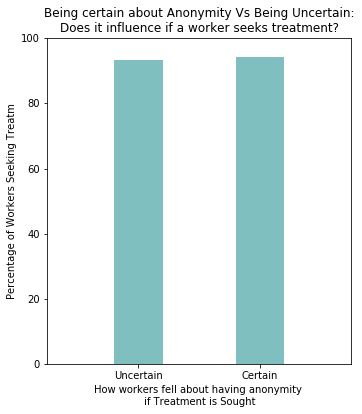

In [497]:
# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks


fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)

ax.bar(
    x_axis, 
#     [0, 0.7], 
    anonymity_percentages,
    color='teal',
    alpha=0.5, 
    align="center",
    width = 0.4 # the width of the bars 
)

# =================================================== #mr
# MR only way to render is to run all commands in same cell :/

# Tell matplotlib where we would like to place each of our x axis headers

tick_locations = [value for value in x_axis]
# tick_locations = [0, 0.7]
plt.xticks(tick_locations, anonymity_perception)



# ax.set_xticks(tick_locations, anonymity_perception)
# Sets the x limits of the current chart
# plt.xlim(-0.75, len(x_axis)-0.25)
ax.set_xlim(-0.75, len(x_axis)-0.25)



# Sets the y limits of the current chart
ax.set_ylim(0, 100)
# Give our chart some labels and a tile
ax.set_title("Being certain about Anonymity Vs Being Uncertain:\nDoes it influence if a worker seeks treatment?")
ax.set_xlabel("How workers fell about having anonymity \nif Treatment is Sought")
plt.ylabel("Percentage of Workers Seeking Treatm")

# plt.text(1, 0)


In [467]:
genderless_anonymity_summary_df['Uncertain Anonymity & sought treatment %']

0    93.3
Name: Uncertain Anonymity & sought treatment %, dtype: float64

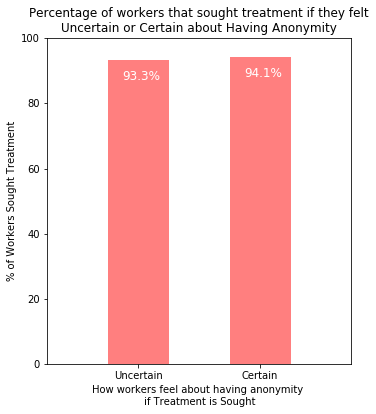

In [521]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)

ax.bar(
    x_axis, 
#     [0, 0.7], 
    anonymity_percentages,
    color='red',
    alpha=0.5, 
    align="center",
#     align="edge",
    width = 0.5 # the width of the bars 
)


tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, anonymity_perception)

ax.set_xlim(-0.75, len(x_axis)-0.25)

ax.set_ylim(0, 100)
ax.set_title("Percentage of workers that sought treatment if they felt\nUncertain or Certain about Having Anonymity")
ax.set_xlabel("How workers feel about having anonymity \nif Treatment is Sought")
ax.set_ylabel("% of Workers Sought Treatment")


# # set individual bar lables
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-6, \
            str(round((i.get_height()), 2))+'%', fontsize=12,
                color='white')
    
fig.savefig('Figures/anonymity.png')
plt.savefig('Figures/anonymity.svg', format='svg', dpi=1500,bbox_inches = 'tight')


In [458]:
totals

[93.3, 93.3]

#### TESTING CALCULATIONS

In [132]:
#DIAGNOSED
diagnosed_count = tech_workers_df[(tech_workers_df['Q27'] == 'Yes')]['Q27'].count()
diagnosed_count

127

In [133]:
#DIAGNOSED AND SOUGHT TREATMENT
diagnosed_sought_treamtment_count = tech_workers_df[(tech_workers_df['Q27'] == 'Yes') & (tech_workers_df['Q29'] == "Yes")]['Q29'].count()
diagnosed_sought_treamtment_count

118

In [160]:
#OF THOSE DIAGNOSED, WHAT PERCENTAGE SOUGHT TREATMENT?
diangonsed_sought_treatment_percent = diagnosed_sought_treamtment_count/diagnosed_count
round(diangonsed_sought_treatment_percent*100,1)

92.9

In [152]:
# OF THOSE DIAGNOSED, HOW MANY BELIEVE WILL HAVE ANONYMITY IF THEY SEEK TREATMENT? 
diagnosed_anonymity_count = tech_workers_df[(tech_workers_df['Q27'] == 'Yes') & (tech_workers_df['Q8'] == "Yes")]['Q8'].count()
diagnosed_anonymity_count

34

In [153]:
# OF THOSE DIAGNOSED WHO BELIVE WILL HAVE ANONYMITY,  HOW MANY SOUGHT TREATMENT?
diagnosed_anonymity_sought_treamtment_count = tech_workers_df[(tech_workers_df['Q27'] == 'Yes')& (tech_workers_df['Q8'] == "Yes") & (tech_workers_df['Q29'] == "Yes")]['Q29'].count()
diagnosed_anonymity_sought_treamtment_count


32

In [157]:
#OF THOSE DIAGNOSED THAT BELIEVE WILL HAVE ANONYMITY, WHAT PERCENTAGE SOUGHT TREATMENT?

diagnosed_anonymity_sought_treamtment_percent = diagnosed_anonymity_sought_treamtment_count / diagnosed_anonymity_count
round(diagnosed_anonymity_sought_treamtment_percent * 100, 1)

94.1

In [161]:
# DIAGNOSED BELIEVES NO ANONYMITY
tech_workers_df[(tech_workers_df['Q27'] == 'Yes') & (tech_workers_df['Q8'] == "No")].count()['Q8']  #['Q27']


4

In [162]:
# DIAGNOSED BELIEVES NO ANONYMITY SOUGHT TREATMENT
tech_workers_df[(tech_workers_df['Q27'] == 'Yes') & (tech_workers_df['Q8'] == "No") & (tech_workers_df['Q29'] == 'Yes') ].count()['Q8']  #['Q27']


3

In [176]:
# DIAGNOSED DOES NOT KNOW IF WILL HAVE ANONYMITY
dianosed_notsure_anonymity = tech_workers_df[(tech_workers_df['Q27'] == 'Yes') & (tech_workers_df['Q8'] == "I don't know")]['Q8'].count()
dianosed_notsure_anonymity

89

In [292]:
# DIAGNOSED DOES NOT KNOW IF WILL HAVE ANONYMITY AND SOUGHT TREATMENT
dianosed_notsure_if_anonymity_sought_treatment = \
tech_workers_df[(tech_workers_df['Q27'] == 'Yes') & (tech_workers_df['Q8'] == "I don't know") & (tech_workers_df['Q29'] == 'Yes') ]['Q29'].count()

dianosed_notsure_if_anonymity_sought_treatment

83

In [294]:
# OF THOSE DIAGNOSED THAT ARE NOT  SURE IF WILL HAVE ANONYMITY, WHAT PERCENTAGE SOUGHT TREATMENT
dianosed_notsure_if_anonymity_sought_treatment_percent =  dianosed_notsure_anonymity_sought_treatment / dianosed_notsure_anonymity
round(dianosed_notsure_if_anonymity_sought_treatment_percent * 100 ,2)

In [171]:
tech_workers_df['Q8'].value_counts().sum()

248

In [163]:
tech_workers_df['Q8'].value_counts()

I don't know    163
Yes              71
No               14
Name: Q8, dtype: int64

In [184]:
# Tech Workers that sought treatment wether or not they were diagnosed

tech_workers_df['Q29'].value_counts()

Yes    143
No     105
Name: Q29, dtype: int64

In [185]:
# Tech Workers that sought treatment wether or not they were diagnosed percentage

143/248

0.5766129032258065